In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-04-25 10:26:55.860708: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-25 10:26:56.122719: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 10:27:07.984886: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


-Need to do a sort of sentiment analysis like with word vectorization
-Load in other data things


https://www.kaggle.com/code/mehmetlaudatekman/tutorial-word-embeddings-with-svm

In [2]:
shower_dp = 'data/Showerthoughts.csv'
shower_data = pd.read_csv(shower_dp,header=0)
shower_data.head()

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.372964e+09,2785,self.Showerthoughts,1hncvt,"If Hillary Clinton wins in 2016, it will be th...",4750,1965,265,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hncvt,http://www.reddit.com/r/Showerthoughts/comment...,NaN
1,1.372606e+09,2488,self.Showerthoughts,1hd8in,I am just a penis. The rest of me is just ther...,4011,1523,162,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hd8in,http://www.reddit.com/r/Showerthoughts/comment...,NaN
2,1.361920e+09,2387,self.Showerthoughts,19aft0,A TV channel where all the shows are set in th...,2558,171,77,http://www.reddit.com/r/Showerthoughts/comment...,"You could have crime drama's, sitcoms, science...",...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_19aft0,http://www.reddit.com/r/Showerthoughts/comment...,NaN
3,1.370793e+09,2038,self.Showerthoughts,1fzgzv,If the oldest person on earth is 116 years old...,2559,521,71,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1fzgzv,http://www.reddit.com/r/Showerthoughts/comment...,NaN
4,1.371846e+09,2007,self.Showerthoughts,1gte67,"If Kanye and Kim's child's name is North West,...",2687,680,76,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1gte67,http://www.reddit.com/r/Showerthoughts/comment...,NaN


In [3]:
shower_data.columns

Index(['created_utc', 'score', 'domain', 'id', 'title', 'ups', 'downs',
       'num_comments', 'permalink', 'selftext', 'link_flair_text', 'over_18',
       'thumbnail', 'subreddit_id', 'edited', 'link_flair_css_class',
       'author_flair_css_class', 'is_self', 'name', 'url', 'distinguished'],
      dtype='object')

In [4]:
shower_data = shower_data.drop(['domain', 'id','permalink', 'over_18','link_flair_css_class',
       'author_flair_css_class', 'selftext','thumbnail', 'name', 'url', 'link_flair_text','distinguished'], axis='columns')
shower_data.columns

Index(['created_utc', 'score', 'title', 'ups', 'downs', 'num_comments',
       'subreddit_id', 'edited', 'is_self'],
      dtype='object')

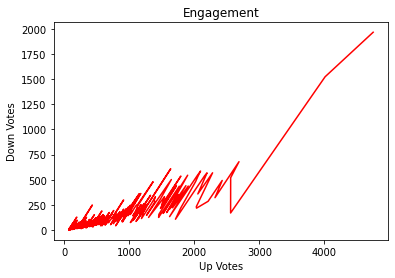

In [5]:
plt.plot(shower_data['ups'], shower_data['downs'],color="r")
plt.xlabel("Up Votes")
plt.ylabel("Down Votes")
plt.title("Engagement")
plt.show()

In [6]:
shower_data["engagement"] = shower_data["ups"] + shower_data["downs"] + shower_data["num_comments"]

In [7]:
#August 20th 2013 date created


In [8]:
shower_data

,created_utc,score,title,ups,downs,num_comments,subreddit_id,edited,is_self,engagement
0,1.372964e+09,2785,"If Hillary Clinton wins in 2016, it will be th...",4750,1965,265,t5_2szyo,False,True,6980
1,1.372606e+09,2488,I am just a penis. The rest of me is just ther...,4011,1523,162,t5_2szyo,False,True,5696
2,1.361920e+09,2387,A TV channel where all the shows are set in th...,2558,171,77,t5_2szyo,False,True,2806
3,1.370793e+09,2038,If the oldest person on earth is 116 years old...,2559,521,71,t5_2szyo,False,True,3151
4,1.371846e+09,2007,"If Kanye and Kim's child's name is North West,...",2687,680,76,t5_2szyo,False,True,3443
...,...,...,...,...,...,...,...,...,...,...
995,1.376188e+09,66,Deaf people using captions to watch TV have no...,75,9,9,t5_2szyo,False,True,93
996,1.375852e+09,64,I wonder how much ink I've saved through my li...,76,12,7,t5_2szyo,False,True,95
997,1.374782e+09,65,Everyone I've ever known has probably cried th...,70,5,14,t5_2szyo,False,True,89
998,1.374438e+09,62,Wouldn't it be more logical to restart the yea...,75,13,12,t5_2szyo,False,True,100


In [9]:
import nltk
from nltk.tokenize import word_tokenize

In [10]:
nltk.download(['punkt', "names", "stopwords", "averaged_perceptron_tagger", "vader_lexicon"])

[nltk_data] Downloading package punkt to
[nltk_data]     /home/DAVIDSON/branthony/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     /home/DAVIDSON/branthony/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/DAVIDSON/branthony/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/DAVIDSON/branthony/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/DAVIDSON/branthony/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
trial = shower_data['title']
tokens = trial.apply(lambda x: word_tokenize(x))
#tokenizing all of the 'title' column, need to now vectorize them// word embeddings

In [12]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords.append(".")
stopwords.append(",")

#Cleaning out stopwords
clean = []
for sent in tokens:
    new_sent = []
    for word in sent:
        if word.lower() not in stopwords:
            new_sent.append(word)
    clean.append(new_sent)
         

In [13]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_words = get_all_words(clean)

In [14]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_words)
print(freq_dist_pos.most_common(10))


[('?', 215), ('``', 181), ("''", 181), ("'s", 124), ("n't", 117), ('would', 101), ('people', 96), ('like', 82), ('wonder', 58), ("'", 57)]


In [15]:
import nltk.sentiment 
from nltk.sentiment import SentimentIntensityAnalyzer

In [16]:
sia = SentimentIntensityAnalyzer()

In [17]:
def sentiment_to_df(titles):
    neg = []
    neu = []
    pos = []
    for t in titles:
        scores = sia.polarity_scores(t)
        neg.append(scores['neg'])
        neu.append(scores['neu'])
        pos.append(scores['pos'])
        
    return neg, neu, pos

In [18]:
neg, neu, pos = sentiment_to_df(shower_data['title'])
shower_data['neg'] = neg
shower_data['neu'] = neu
shower_data['pos'] = pos
shower_data
#TF-IDF

,created_utc,score,title,ups,downs,num_comments,subreddit_id,edited,is_self,engagement,neg,neu,pos
0,1.372964e+09,2785,"If Hillary Clinton wins in 2016, it will be th...",4750,1965,265,t5_2szyo,False,True,6980,0.000,0.844,0.156
1,1.372606e+09,2488,I am just a penis. The rest of me is just ther...,4011,1523,162,t5_2szyo,False,True,5696,0.000,0.901,0.099
2,1.361920e+09,2387,A TV channel where all the shows are set in th...,2558,171,77,t5_2szyo,False,True,2806,0.000,1.000,0.000
3,1.370793e+09,2038,If the oldest person on earth is 116 years old...,2559,521,71,t5_2szyo,False,True,3151,0.000,1.000,0.000
4,1.371846e+09,2007,"If Kanye and Kim's child's name is North West,...",2687,680,76,t5_2szyo,False,True,3443,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.376188e+09,66,Deaf people using captions to watch TV have no...,75,9,9,t5_2szyo,False,True,93,0.089,0.729,0.182
996,1.375852e+09,64,I wonder how much ink I've saved through my li...,76,12,7,t5_2szyo,False,True,95,0.000,0.865,0.135
997,1.374782e+09,65,Everyone I've ever known has probably cried th...,70,5,14,t5_2szyo,False,True,89,0.148,0.852,0.000
998,1.374438e+09,62,Wouldn't it be more logical to restart the yea...,75,13,12,t5_2szyo,False,True,100,0.000,1.000,0.000


In [19]:
features = shower_data[['neg', 'neu', 'pos']]
targets = shower_data['ups']

features_norm = (features-features.min())/(features.max()-features.min())
targets_norm = (targets-targets.min())/(targets.max()-targets.min())

In [20]:
features

,neg,neu,pos
0,0.000,0.844,0.156
1,0.000,0.901,0.099
2,0.000,1.000,0.000
3,0.000,1.000,0.000
4,0.000,1.000,0.000
...,...,...,...
995,0.089,0.729,0.182
996,0.000,0.865,0.135
997,0.148,0.852,0.000
998,0.000,1.000,0.000


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
feat = scaler.transform(features)
feat

array([[0.        , 0.80693069, 0.2392638 ],
       [0.        , 0.87747525, 0.15184049],
       [0.        , 1.        , 0.        ],
       ...,
       [0.21052632, 0.81683168, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ]])

In [22]:
target_scaler = MinMaxScaler()
t = np.array(targets).reshape(-1, 1)
target_scaler.fit(t)

targ = target_scaler.transform(t)
targ

array([[1.00000000e+00],
       [8.42094017e-01],
       [5.31623932e-01],
       [5.31837607e-01],
       [5.59188034e-01],
       [4.80341880e-01],
       [5.04059829e-01],
       [4.57692308e-01],
       [4.19658120e-01],
       [4.19017094e-01],
       [4.72435897e-01],
       [4.23931624e-01],
       [4.54273504e-01],
       [4.45726496e-01],
       [3.50427350e-01],
       [3.67094017e-01],
       [4.16666667e-01],
       [4.25000000e-01],
       [4.32905983e-01],
       [4.21794872e-01],
       [3.31196581e-01],
       [3.92521368e-01],
       [3.41025641e-01],
       [3.84829060e-01],
       [3.32051282e-01],
       [3.60256410e-01],
       [3.48931624e-01],
       [3.21367521e-01],
       [3.90598291e-01],
       [3.10042735e-01],
       [3.60256410e-01],
       [3.63034188e-01],
       [2.95085470e-01],
       [2.95940171e-01],
       [3.53418803e-01],
       [3.07905983e-01],
       [3.28846154e-01],
       [3.01068376e-01],
       [3.68162393e-01],
       [3.04700855e-01],


In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
features_poly = poly.fit_transform(features_norm)
f_poly = poly.fit_transform(feat)

In [24]:
features_poly

array([[1.        , 0.        , 0.80693069, ..., 0.65113714, 0.19306931,
        0.05724717],
       [1.        , 0.        , 0.87747525, ..., 0.76996281, 0.13323627,
        0.02305553],
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.21052632, 0.81683168, ..., 0.667214  , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(f_poly, targ, test_size=0.2)

In [26]:
y_train

array([[8.97435897e-03],
       [1.94230769e-01],
       [5.76923077e-03],
       [1.83760684e-02],
       [5.98290598e-03],
       [2.92735043e-02],
       [2.35042735e-03],
       [1.70940171e-02],
       [1.47649573e-01],
       [4.61538462e-02],
       [1.28205128e-03],
       [4.25000000e-01],
       [0.00000000e+00],
       [2.99145299e-03],
       [6.83760684e-02],
       [4.50854701e-02],
       [2.56410256e-02],
       [1.64529915e-02],
       [5.98290598e-03],
       [3.04700855e-01],
       [7.54273504e-02],
       [2.47863248e-02],
       [1.53846154e-02],
       [5.64102564e-02],
       [1.75213675e-02],
       [2.47222222e-01],
       [2.86324786e-02],
       [4.05982906e-03],
       [1.75427350e-01],
       [5.55555556e-03],
       [5.66239316e-02],
       [2.55341880e-01],
       [1.01709402e-01],
       [1.08974359e-02],
       [4.25213675e-02],
       [4.61538462e-02],
       [5.55555556e-02],
       [1.98717949e-02],
       [3.24786325e-02],
       [1.08119658e-01],


In [27]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
preds = reg.predict(X_test)
mean_squared_error(y_test, preds)

/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.008536651792726252

In [28]:
targets.iloc[0]

4750

In [29]:

#features.iloc[0].reshape(1, -1)
x = np.array(features.iloc[996].tolist()).reshape(1, -1)
x_poly = poly.fit_transform(x)
x_poly

array([[1.      , 0.      , 0.865   , 0.135   , 0.      , 0.      ,
        0.      , 0.748225, 0.116775, 0.018225]])

In [30]:
fun = reg.predict(x_poly)

In [31]:
fun

array([0.06439513])

In [32]:
target_scaler.inverse_transform([fun])

array([[371.36919092]])

In [33]:
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [34]:
 # config values// Beginning of word embeddings
embed_size = 300 # how big is each word vector
max_features = 50000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a question to use

In [35]:
texts = shower_data['title']
targets_ups = shower_data['ups']
clean

[['Hillary',
  'Clinton',
  'wins',
  '2016',
  'first',
  'time',
  'two',
  'presidents',
  'sex'],
 ['penis',
  'rest',
  'make',
  'sure',
  'penis',
  'survives',
  'long',
  'enough',
  'make',
  'penises'],
 ['TV', 'channel', 'shows', 'set', 'universe'],
 ['oldest',
  'person',
  'earth',
  '116',
  'years',
  'old',
  '117',
  'years',
  'ago',
  'completely',
  'different',
  'set',
  'human',
  'beings',
  'earth'],
 ['Kanye',
  'Kim',
  "'s",
  'child',
  "'s",
  'name',
  'North',
  'West',
  'makes',
  'Kim',
  "'s",
  'vagina',
  'Northwest',
  'Passage'],
 ['start',
  'deliver',
  'company',
  'hooters',
  'girls',
  'deliver',
  'food',
  'call',
  '``',
  'Knockers',
  "''"],
 ['Interesting',
  'use',
  'ladle',
  'get',
  'broth',
  'go',
  'brothel',
  'get',
  'laid'],
 ['wake', 'die', 'dream', "n't", 'know', 'happens', 'next'],
 ['Let',
  "'s",
  'take',
  'moment',
  'appreciate',
  'Mother',
  'Nature',
  'pre-sliced',
  'also',
  'pre-wrapped',
  'oranges'],
 ['

In [36]:
X_train, X_test, y_train, y_test = train_test_split(clean, targ, test_size=.2, train_size=.8, random_state=None, shuffle=True, stratify=None)

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [37]:
X_train

array([[   0,    0,    0, ...,  535,  995,  536],
       [   0,    0,    0, ...,  144,  996,  997],
       [   0,    0,    0, ...,  999,   16,    1],
       ...,
       [   0,    0,    0, ..., 2850,  205, 2851],
       [   0,    0,    0, ...,    6,   62,  411],
       [   0,    0,    0, ...,  449, 2857, 2858]], dtype=int32)

In [44]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
preds = reg.predict(X_test)
mean_squared_error(y_test, preds)
preds.max()

/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.12302784565827732

In [43]:
shower_data['ups'].max()

4750